In [2]:
import numpy as np
import pandas as pd
import scipy.signal as sg
import matplotlib.pyplot as plt
import time as t 
from scipy.interpolate import make_smoothing_spline
from analysis_tools import *
from SIMHigh5 import SIMHigh5

# Checks

### Time serie analysis

#### One timeserie

In [3]:
# h5file = r'.\_ResultsH5\DecayMulti\decay_tests_SERAG.h5'
load_list = [
    r'.\_ResultsH5\V03_timestorage0d05\testFlexibleMB300s.h5',
    # r'.\_ResultsH5\V03_timestorage0d05\testBaseline300s.h5',
    r'.\_ResultsH5\V02_timestorage0d025\constantwindworkflow_Results.h5',

]

dynamic_keys = {
                'platform//Global total position//XGtranslationTotalmotion':'Surge [m]',
                'platform//Global total position//YGtranslationTotalmotion':'Sway [m]',
                'platform//Global total position//ZGtranslationTotalmotion':'Heave [m]',
                'platform//Global total position//XLrotationTotalmotion':'Roll [deg]',
                'platform//Global total position//YLrotationTotalmotion':'Pitch [deg]',
                'platform//Global total position//ZGrotationTotalmotion':'Yaw [deg]',
                'Origo/Wave elevation/Totalwaveelevation':'Elevation [m]',
}

H1 = SIMHigh5(load_list[0],dynamic_keys, source="file")

H1.merge([SIMHigh5(load_list[i],dynamic_keys, source="file") for i in range(1,len(load_list))])

T_min, T_max = 0, 300

H1_perm = H1.select_time_window(T_min, T_max)

No  Surge [m]  found for condition  ConstantSet_1 on model  FlexibleMB_C1P5 with analysis  Static .
No  Sway [m]  found for condition  ConstantSet_1 on model  FlexibleMB_C1P5 with analysis  Static .
No  Heave [m]  found for condition  ConstantSet_1 on model  FlexibleMB_C1P5 with analysis  Static .
No  Roll [deg]  found for condition  ConstantSet_1 on model  FlexibleMB_C1P5 with analysis  Static .
No  Pitch [deg]  found for condition  ConstantSet_1 on model  FlexibleMB_C1P5 with analysis  Static .
No  Yaw [deg]  found for condition  ConstantSet_1 on model  FlexibleMB_C1P5 with analysis  Static .
No  Elevation [m]  found for condition  ConstantSet_1 on model  FlexibleMB_C1P5 with analysis  Static .
No  Surge [m]  found for condition  ConstantSet_2 on model  FlexibleMB_C1P5 with analysis  Static .
No  Sway [m]  found for condition  ConstantSet_2 on model  FlexibleMB_C1P5 with analysis  Static .
No  Heave [m]  found for condition  ConstantSet_2 on model  FlexibleMB_C1P5 with analysis  Stat

In [5]:
outputs = ['Surge [m]', 'Pitch [deg]', 'Yaw [deg]']
cond = H1_perm.df.coords['condition'].values[0]
fig,ax = plt.subplots(len(outputs),1, figsize=(15, 15), dpi=600)

for j,output in enumerate(outputs):
    time, serie = H1_perm.timeserie({'model':'FlexibleMB_C1P5', 'condition':cond, 'analysis':'Dynamic'}, output)
    ax[j].plot(time, serie)
    ax[j].set_title('Condition : ' + cond)
    ax[j].set_xlabel('Time (s)')
    ax[j].set_ylabel(output)

fig.tight_layout()

count    12000.000000
mean         6.254479
std          6.174011
min         -0.629348
25%          0.897225
50%          2.092842
75%         12.842048
max         17.738800
Name: Surge [m], dtype: float64
count    12000.000000
mean         0.952722
std          2.467716
min         -2.777875
25%         -1.358905
50%         -0.237976
75%          3.568145
max          4.697260
Name: Pitch [deg], dtype: float64
count    12000.000000
mean        -0.118296
std          0.669341
min         -2.651907
25%         -0.427665
50%         -0.000041
75%          0.074499
max          1.758113
Name: Yaw [deg], dtype: float64


In [8]:
def error(x1, x2):
    return round(100 * np.linalg.norm(x1 - x2)/np.linalg.norm(x2),2)

def errorBRF(x_B, x_R, x_F):
    print('Error between Baseline and Rigid : ', error(x_B,x_R)) #round(100 * np.sqrt(np.mean((x_B - x_R)**2))/np.sqrt(np.mean(x_B**2)),2), ' %')
    # print('Error between Baseline and Flexible : ', error(x_B,x_F)) #round(100 * np.sqrt(np.mean((x_B - x_F)**2))/np.sqrt(np.mean(x_B**2)), 2), ' %')
    print('Error between Rigid and Flexible : ', error(x_F,x_R)) #round(100 * np.sqrt(np.mean((x_R - x_F)**2))/np.sqrt(np.mean(x_B**2)), 2), ' %')
    print('-----------------------------------')

#### Multiple timeseries

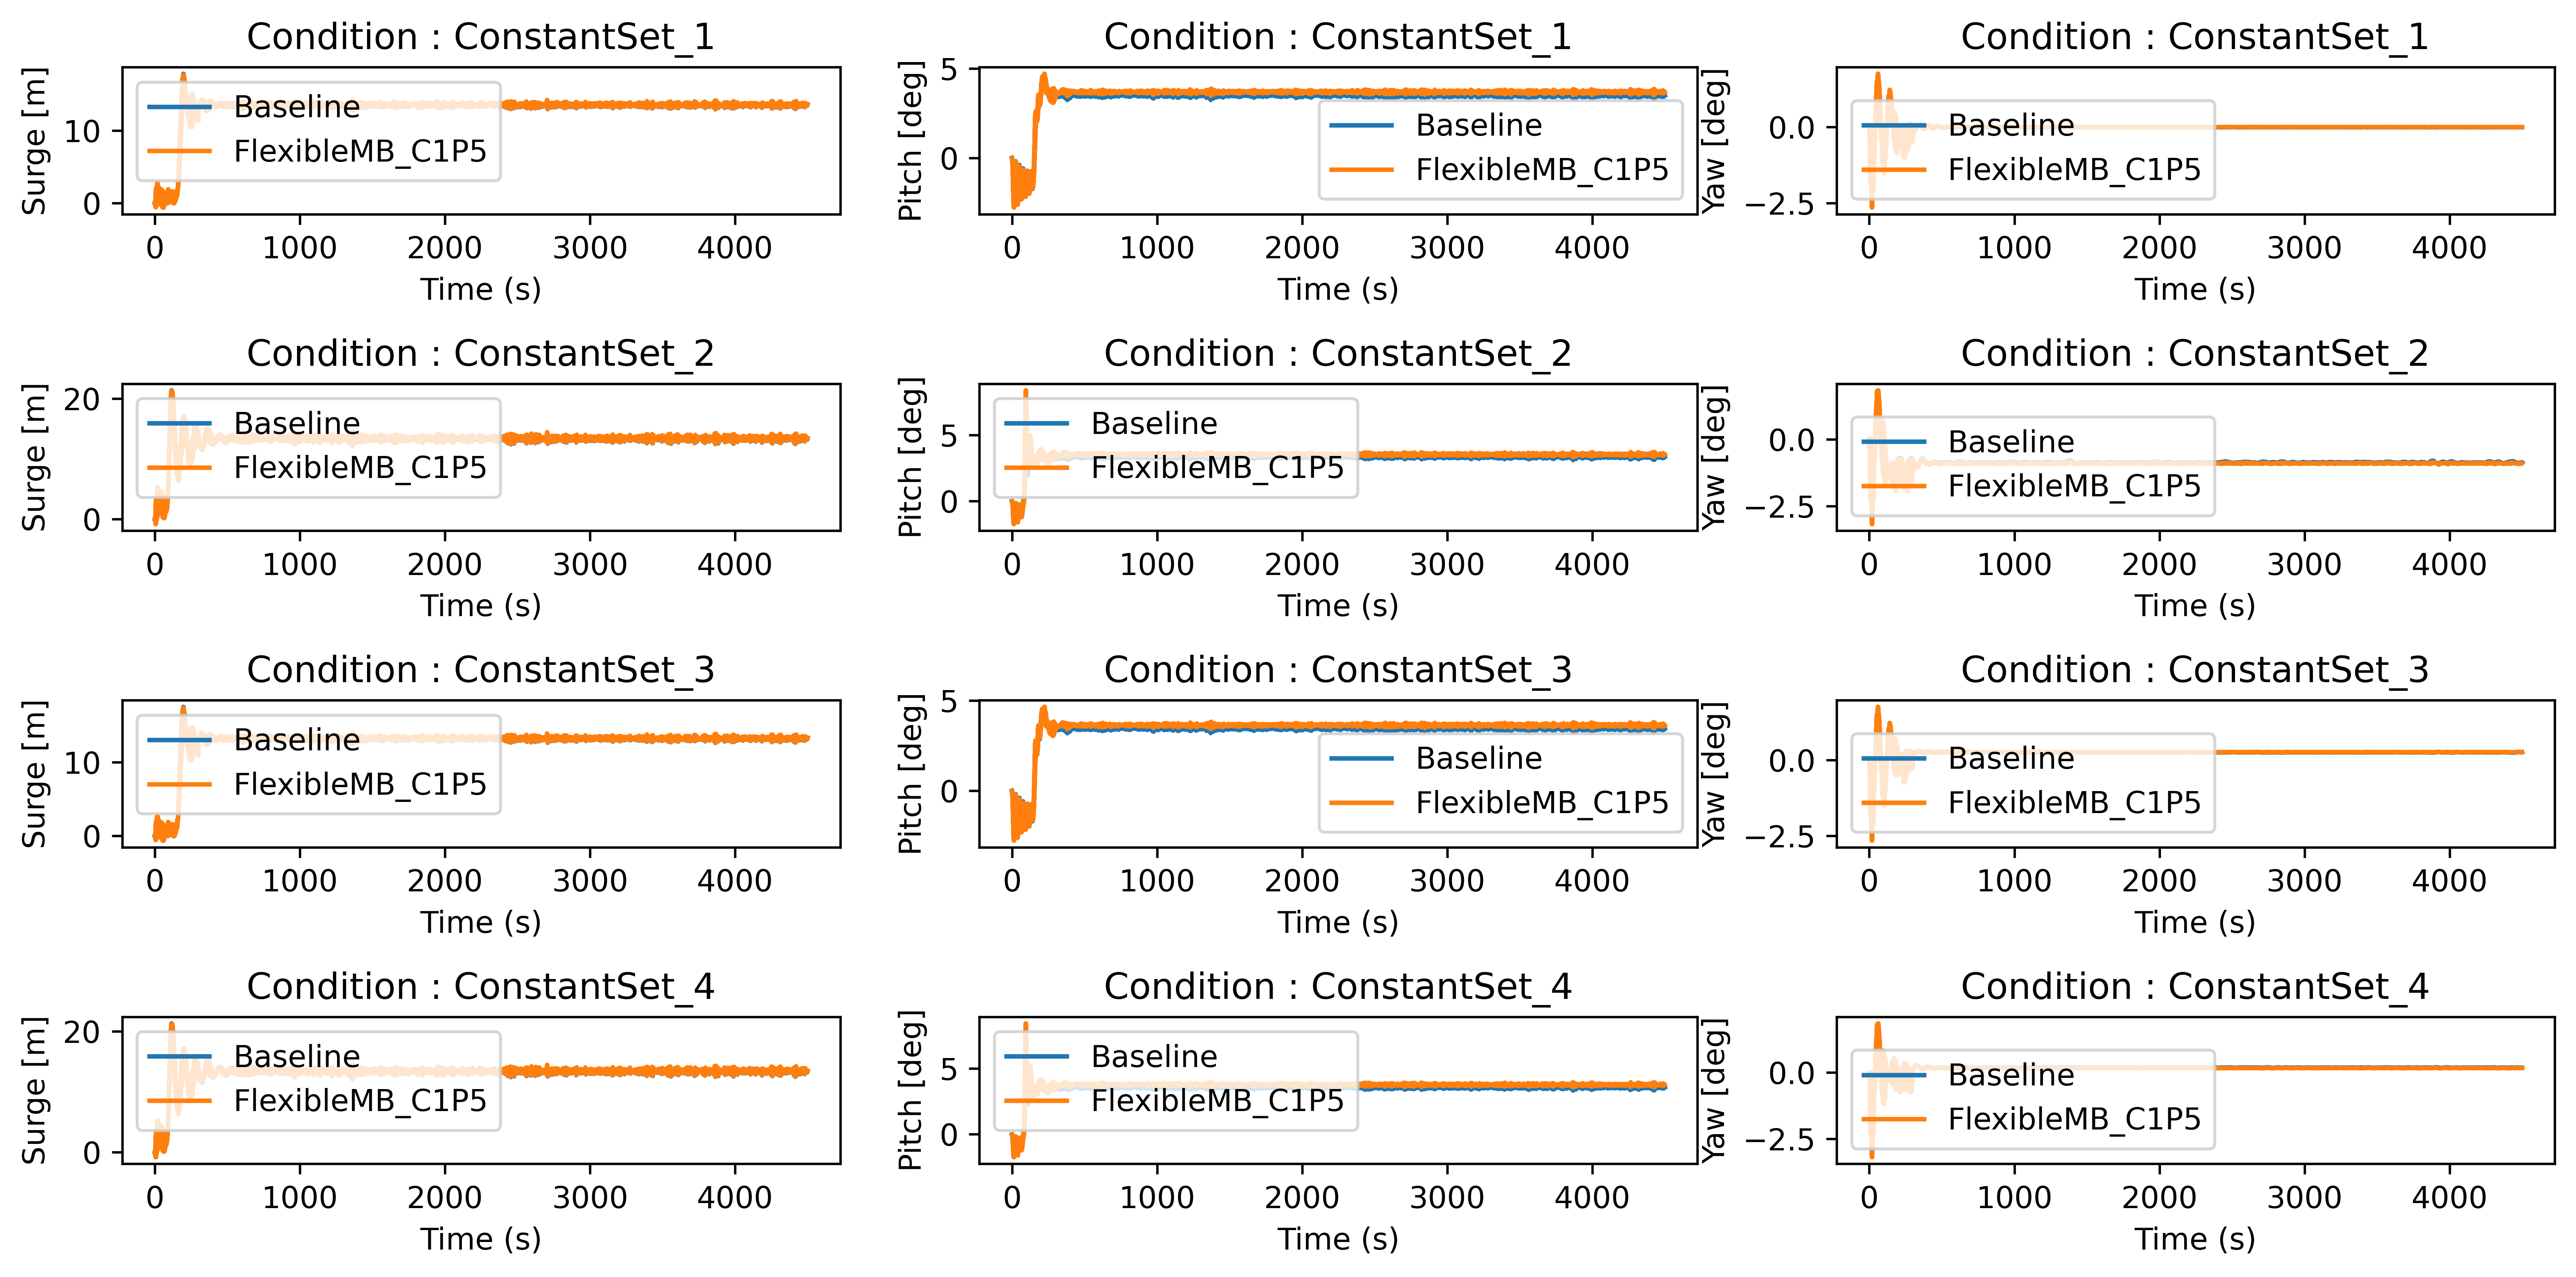

In [6]:
outputs = ['Surge [m]', 'Pitch [deg]', 'Yaw [deg]']
conds = H1_perm.df.coords['condition'].values
fig,ax = plt.subplots(len(conds),len(outputs), figsize=(12, 6), dpi=600)

for i, cond in enumerate(conds):
    for j,output in enumerate(outputs):
        H1.comparePlot_timeseries(ax[i,j],'model',{'condition':cond, 'analysis':'Dynamic'},output)
        ax[i,j].set_title('Condition : ' + cond)
        ax[i,j].set_xlabel('Time (s)')
        ax[i,j].set_ylabel(output)
        # errorBRF(*timeseries)


fig.tight_layout()

# Consistence with litterature

## Load everything

In [ ]:
# load_list = [
#     r'.\_ResultsH5\Baseline_\Baseline_ConstWind_Results.h5',
# r'.\_ResultsH5\Baseline_\Baseline_KaimalTurbulence_Results.h5',
# r'.\_ResultsH5\Baseline_\Baseline_MannTurbulence_Results.h5',
# r'.\_ResultsH5\Flexible_\FlexibleC1P5_ConstWind_Results.h5',
# r'.\_ResultsH5\Flexible_\FlexibleC1P5_KaimalTurbulence_Results.h5',
# r'.\_ResultsH5\Flexible_\FlexibleC1P5_MannTurbulence_Results.h5'
# ]

load_list = [
    r'.\_ResultsH5\Baseline_\BaselineV02_Mann_Results.h5',
    r'.\_ResultsH5\Baseline_\BaselineV02_Kaimal_Results.h5'
]

dynamic_keys = {
                'platform//Global total position//XGtranslationTotalmotion':'Surge [m]',
                'platform//Global total position//YGtranslationTotalmotion':'Sway [m]',
                'platform//Global total position//ZGtranslationTotalmotion':'Heave [m]',
                'platform//Global total position//XLrotationTotalmotion':'Roll [deg]',
                'platform//Global total position//YLrotationTotalmotion':'Pitch [deg]',
                'platform//Global total position//ZGrotationTotalmotion':'Yaw [deg]',
                'line1//segment_1//node_1//Displacement in x - direction':'Xfairlead1 [m]',
                'line1//segment_1//node_1//Displacement in y - direction':'Yfairlead1 [m]',
                'line1//segment_1//node_1//Displacement in z - direction':'Zfairlead1 [m]',
                'Origo/Wave elevation/Totalwaveelevation':'Elevation [m]',
                'nacelle/Wind velocity/Velocityinmaindirection':'WindVelocity [m/s]',
                'turbine/Rotor speed (rpm)':'RotorSpeed [rpm]',
                'tower//segment_1//element_1//Mom_ about local y-axis, end 1':'ForeAftBendingMoment [Nm]',
                # 'turbine/Incoming wind speed X-dir in shaft system':'WindVelocity [m/s]',
                }

H1 = SIMHigh5(load_list[0],dynamic_keys, source="file")

H1.merge([SIMHigh5(load_list[i],dynamic_keys, source="file") for i in range(1,len(load_list))])

T_trans = 900
H1_perm = H1.skip_transient(T_trans)

## Turbulent wind

### Timeseries of the turbulent wind

In [ ]:
outputs = ['WindVelocity [m/s]']
conds = H1_perm.df.coords['condition'].values[:2]
fig,ax = plt.subplots(len(conds),len(outputs), figsize=(len(conds)*5, len(outputs)*5), dpi=600)

for i, cond in enumerate(conds):
    for j,output in enumerate(outputs):
        # H_sel = H1_perm.selection(dict(condition = ['Kaimal_TurbulentWindSet_1', 'Kaimal_TurbulentWindSet_2']))
        H1_perm.comparePlot_timeseries(ax[i],'condition',{'model':'Baseline', 'analysis':'Dynamic'},output)
        # H_sel.comparePlot_timeseries(ax[i],'model',{'condition':'Kaimal_TurbulentWindSet_1', 'analysis':'Dynamic'},output)
        ax[i].set_title('Condition : ' + cond)
        # errorBRF(*timeseries)


fig.tight_layout()

### Mean and standard deviation of Wind and Rotor speed

In [ ]:
outputs = ['WindVelocity [m/s]', 'RotorSpeed [rpm]']
conds = H1_perm.df.coords['condition'].values#[:2]
x_name = 'U_hub (m/s)'
x_vals = np.array([8,14])

print('create below a dictonary with the conditions associated with the correspondant value of x_val')
print('Here are the conditions : ')
print(conds)

In [ ]:
# dict_cond_x = {
#     'ConstantWindSet_1':8,
#     'ConstantWindSet_2':14,
#     'Kaimal_TurbulentWindSet_1':8,
#     'Kaimal_TurbulentWindSet_2':14,
#     'Mann_TurbulentWindSet_1':8,
#     'Mann_TurbulentWindSet_2':14
# }
dict_cond_x = {'KaimalSet_1':8, 'KaimalSet_10':14, 'KaimalSet_11':14, 'KaimalSet_12':14, 'KaimalSet_2':8,
 'KaimalSet_3':8, 'KaimalSet_4':8, 'KaimalSet_5':8, 'KaimalSet_6':8, 'KaimalSet_7':14,
 'KaimalSet_8':14, 'KaimalSet_9':14, 'MannSet_1':8, 'MannSet_10':14, 'MannSet_11':14,
 'MannSet_12':14, 'MannSet_2':8, 'MannSet_3':8, 'MannSet_4':8, 'MannSet_5':8, 'MannSet_6':8,
 'MannSet_7':14, 'MannSet_8':14, 'MannSet_9':14}

# dict_cond_colors = {
#     'ConstantWindSet_1':'black',
#     'ConstantWindSet_2':'black',
#     'Kaimal_TurbulentWindSet_1':'blue',
#     'Kaimal_TurbulentWindSet_2':'blue',
#     'Mann_TurbulentWindSet_1':'red',
#     'Mann_TurbulentWindSet_2':'red'
# }
dict_cond_colors = {'KaimalSet_1':'cyan', 'KaimalSet_10':'blue', 'KaimalSet_11':'blue', 'KaimalSet_12':'blue', 'KaimalSet_2':'cyan',
 'KaimalSet_3':'cyan', 'KaimalSet_4':'cyan', 'KaimalSet_5':'cyan', 'KaimalSet_6':'cyan', 'KaimalSet_7':'blue',
 'KaimalSet_8':'blue', 'KaimalSet_9':'blue', 'MannSet_1':'red', 'MannSet_10':'orange', 'MannSet_11':'orange',
 'MannSet_12':'orange', 'MannSet_2':'red', 'MannSet_3':'red', 'MannSet_4':'red', 'MannSet_5':'red', 'MannSet_6':'red',
 'MannSet_7':'orange', 'MannSet_8':'orange', 'MannSet_9':'orange'}

In [ ]:
fig,ax = plt.subplots(2,2, figsize=(12, 8), dpi=600)

l = "IEC standard"
expected_sigmaU = lambda u : 0.14*(0.75*u + 5.6) # From IEC 61400-1:2019

leg = []
for i, cond in enumerate(conds):
    run, var = H1_perm.extract_run({'model':'Baseline', 'analysis':'Dynamic', 'condition':cond}, show = False)
    leg.append(cond)
    for j, output in enumerate(outputs):
        # print('Mean of ' + output + ' =' + str(run[output].mean()))
        ax[0,j].plot(dict_cond_x[cond], run[output].mean(), color = dict_cond_colors[cond],marker='.')
        ax[1,j].plot(dict_cond_x[cond], run[output].std(), color = dict_cond_colors[cond],marker='.')
        ax[0,j].set_xlabel(x_name)
        ax[0,j].set_ylabel('Mean of ' + output)
        ax[1,j].set_xlabel(x_name)
        ax[1,j].set_ylabel('Std of ' + output)

# ax[1,0].legend(leg, ncol=4)
# ax[0,0].legend(leg, ncol=4)
# ax[1,1].legend(leg, ncol=4)
# ax[0,1].legend(leg, ncol=4)
ax[1,0].plot(x_vals, expected_sigmaU(x_vals), color = 'green',ls='-')
fig.legend(conds, ncol = 6, loc = 'upper center', bbox_to_anchor = (0.5, 1.05 ))

## Degrees of Freedom

In [ ]:
outputs = ['Surge [m]', 'Pitch [deg]', 'Yaw [deg]']
# outputs = ['Surge [m]', 'Pitch [deg]', 'Yaw [deg]', 'TensionTopChainL1 [N]']
fig,ax = plt.subplots(2,len(outputs), figsize=(16,6), dpi=600)

# Results from Bachynski / Eliasen
surge5MW = [
    {'Kaimal_TurbulentWindSet':1.3, 'Mann_TurbulentWindSet':1.1},
    {'Kaimal_TurbulentWindSet':1.3, 'Mann_TurbulentWindSet':1.25}
]
pitch5MW = [
    {'Kaimal_TurbulentWindSet':1.2, 'Mann_TurbulentWindSet':1},
    {'Kaimal_TurbulentWindSet':2.7, 'Mann_TurbulentWindSet':2.55}
]
yaw5MW = [
    {'Kaimal_TurbulentWindSet':0.45, 'Mann_TurbulentWindSet':0.6},
    {'Kaimal_TurbulentWindSet':0.65, 'Mann_TurbulentWindSet':0.9}
]
surge10MW = [
    {'Kaimal_TurbulentWindSet':2.1, 'Mann_TurbulentWindSet':1.75},
    {'Kaimal_TurbulentWindSet':2, 'Mann_TurbulentWindSet':1.9}
]
pitch10MW = [
    {'Kaimal_TurbulentWindSet':1.1, 'Mann_TurbulentWindSet':0.9},
    {'Kaimal_TurbulentWindSet':2.3, 'Mann_TurbulentWindSet':2}
]
yaw10MW = [
    {'Kaimal_TurbulentWindSet':0.55, 'Mann_TurbulentWindSet':0.75},
    {'Kaimal_TurbulentWindSet':1, 'Mann_TurbulentWindSet':1.3}
]
litterature = {
    'Surge [m]': [surge5MW, surge10MW], 
    'Pitch [deg]': [pitch5MW, pitch10MW],
    'Yaw [deg]': [yaw5MW, yaw10MW],
}

leg = []
for i, cond in enumerate(conds):
    run, var = H1_perm.extract_run({'model':'Baseline', 'analysis':'Dynamic', 'condition':cond}, show = False)
    leg.append(cond)
    for j, output in enumerate(outputs):
        # print('Mean of ' + output + ' =' + str(run[output].mean()))
        ax[0,j].plot(dict_cond_x[cond], run[output].mean(), color = dict_cond_colors[cond],marker='.')
        ax[1,j].plot(dict_cond_x[cond], run[output].std(), color = dict_cond_colors[cond],marker='.')
        ax[0,j].set_xlabel(x_name)
        ax[0,j].set_ylabel('Mean of ' + output)
        ax[1,j].set_xlabel(x_name)
        ax[1,j].set_ylabel('Std of ' + output)

        if dict_cond_x[cond] == 8:
            ax[1,j].plot(dict_cond_x[cond], litterature[output][0][0]['Kaimal_TurbulentWindSet'], color = 'green', marker='x')
            ax[1,j].plot(dict_cond_x[cond], litterature[output][1][0]['Kaimal_TurbulentWindSet'], color = 'green', marker='+')
            ax[1,j].plot(dict_cond_x[cond], litterature[output][0][0]['Mann_TurbulentWindSet'], color = 'green', marker='x')
            ax[1,j].plot(dict_cond_x[cond], litterature[output][1][0]['Mann_TurbulentWindSet'], color = 'green', marker='+')
        else:
            ax[1,j].plot(dict_cond_x[cond], litterature[output][0][1]['Kaimal_TurbulentWindSet'], color = 'green', marker='x')
            ax[1,j].plot(dict_cond_x[cond], litterature[output][1][1]['Kaimal_TurbulentWindSet'], color = 'green', marker='+')
            ax[1,j].plot(dict_cond_x[cond], litterature[output][0][1]['Mann_TurbulentWindSet'], color = 'green', marker='x')
            ax[1,j].plot(dict_cond_x[cond], litterature[output][1][1]['Mann_TurbulentWindSet'], color = 'green', marker='+')


# ax[1,0].legend(leg, ncol=4)
# ax[0,0].legend(leg, ncol=4)
# ax[1,1].legend(leg, ncol=4)
# ax[0,1].legend(leg, ncol=4)


# DOF Motions Analysis

## Load datas

In [ ]:
load_list = [
    r'.\_ResultsH5\V02_timestorage0d025\BaselineV02_Mann_Results.h5',
    r'.\_ResultsH5\V02_timestorage0d025\BaselineV02_Kaimal_Results.h5'
]

dynamic_keys = {
                'platform//Global total position//XGtranslationTotalmotion':'Surge [m]',
                'platform//Global total position//YGtranslationTotalmotion':'Sway [m]',
                'platform//Global total position//ZGtranslationTotalmotion':'Heave [m]',
                'platform//Global total position//XLrotationTotalmotion':'Roll [deg]',
                'platform//Global total position//YLrotationTotalmotion':'Pitch [deg]',
                'platform//Global total position//ZGrotationTotalmotion':'Yaw [deg]',
                'line1//segment_1//node_1//Displacement in x - direction':'Xfairlead1 [m]',
                'line1//segment_1//node_1//Displacement in y - direction':'Yfairlead1 [m]',
                'line1//segment_1//node_1//Displacement in z - direction':'Zfairlead1 [m]',
                'Origo/Wave elevation/Totalwaveelevation':'Elevation [m]',
                'nacelle/Wind velocity/Velocityinmaindirection':'WindVelocity [m/s]',
                'turbine/Rotor speed (rpm)':'RotorSpeed [rpm]',
                'tower//segment_1//element_1//Mom_ about local y-axis, end 1':'ForeAftBendingMoment [Nm]',
                # 'turbine/Incoming wind speed X-dir in shaft system':'WindVelocity [m/s]',
                }

H1 = SIMHigh5(load_list[0],dynamic_keys, source="file")

H1.merge([SIMHigh5(load_list[i],dynamic_keys, source="file") for i in range(1,len(load_list))])

T_trans = 900
H1_perm = H1.skip_transient(T_trans)

## Spectral analysis

In [ ]:
outputs = [
    'Surge [m]',
    'Heave [m]',
    'Pitch [deg]',
    'Yaw [deg]',
    'ForeAftBendingMoment [Nm]'
]
conds = H1_perm.df.coords['condition'].values#[:2]
dict_cond_colors = {'KaimalSet_1':'cyan', 'KaimalSet_10':'blue', 'KaimalSet_11':'blue', 'KaimalSet_12':'blue', 'KaimalSet_2':'cyan',
 'KaimalSet_3':'cyan', 'KaimalSet_4':'cyan', 'KaimalSet_5':'cyan', 'KaimalSet_6':'cyan', 'KaimalSet_7':'blue',
 'KaimalSet_8':'blue', 'KaimalSet_9':'blue', 'MannSet_1':'red', 'MannSet_10':'orange', 'MannSet_11':'orange',
 'MannSet_12':'orange', 'MannSet_2':'red', 'MannSet_3':'red', 'MannSet_4':'red', 'MannSet_5':'red', 'MannSet_6':'red',
 'MannSet_7':'orange', 'MannSet_8':'orange', 'MannSet_9':'orange'}


fig,ax = plt.subplots(len(outputs),2, figsize=(8, 12), dpi=600)

leg = []
for i, cond in enumerate(conds):
    run, var = H1_perm.extract_run({'model':'Baseline', 'analysis':'Dynamic', 'condition':cond}, show = False)
    leg.append(cond)
    for j, output in enumerate(outputs):
        t, serie = run[output].index, np.array(run[output])
        dt = t[1]-t[0]
        f,Sp = PSD_wave4(serie, dt)

        ax[j,0].plot(f, Sp, color = dict_cond_colors[cond])
        ax[j,0].set_xlabel('Frequency (Hz)')
        ax[j,0].set_ylabel('PSD of ' + output)
        ax[j,0].set_xlim(0.01,1)
        ax[j,1].semilogy(f, Sp, color = dict_cond_colors[cond])
        ax[j,1].set_xlabel('Frequency (Hz)')
        ax[j,1].set_ylabel('PSD of ' + output)
        ax[j,1].set_xlim(0.01,1)
fig.legend(conds, ncol = 6, loc = 'upper center', bbox_to_anchor = (0.5, 1.1 ))
fig.tight_layout()

# Mooring lines Analysis

## Tension along the line

In [16]:
load_list = [
    r'.\_ResultsH5\V02_timestorage0d025\BaselineV02_Mann_Results.h5',
    r'.\_ResultsH5\V02_timestorage0d025\BaselineV02_Kaimal_Results.h5',
    r'.\_ResultsH5\V02_timestorage0d025\FlexibleMBC1P5_Mann_Results.h5',
    r'.\_ResultsH5\V02_timestorage0d025\FlexibleMBC1P5_Kaimal_Results.h5',
]

dynamic_keys = {
                'line1//segment_1//element_1//Axial force':'TensionTopChainL1 [N]',
                'line1//segment_2//element_1//Axial force':'TensionTopRopeL1 [N]',
                'line1//segment_3//element_1//Axial force':'TensionBottomRopeL1 [N]',
                'line1//segment_4//element_1//Axial force':'TensionBottomChainL1 [N]',
                'line2//segment_1//element_1//Axial force':'TensionTopChainL2 [N]',
                'line2//segment_2//element_1//Axial force':'TensionTopRopeL2 [N]',
                'line2//segment_3//element_1//Axial force':'TensionBottomRopeL2 [N]',
                'line2//segment_4//element_1//Axial force':'TensionBottomChainL2 [N]',
                'line3//segment_1//element_1//Axial force':'TensionTopChainL3 [N]',
                'line3//segment_2//element_1//Axial force':'TensionTopRopeL3 [N]',
                'line3//segment_3//element_1//Axial force':'TensionBottomRopeL3 [N]',
                'line3//segment_4//element_1//Axial force':'TensionBottomChainL3 [N]',
                }

H1 = SIMHigh5(load_list[0],dynamic_keys, source="file")

H1.merge([SIMHigh5(load_list[i],dynamic_keys, source="file") for i in range(1,len(load_list))])

T_trans = 900
H1_perm = H1.skip_transient(T_trans)



No  TensionTopChainL1 [N]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  TensionTopRopeL1 [N]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  TensionBottomRopeL1 [N]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  TensionBottomChainL1 [N]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  TensionTopChainL2 [N]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  TensionTopRopeL2 [N]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  TensionBottomRopeL2 [N]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  TensionBottomChainL2 [N]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  TensionTopChainL3 [N]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  TensionTopRopeL3 [N]  found for condition  MannSet_1 on model  Baseline with an

### Statistical analysis

#### With respect to the condition, for one line

In [ ]:
outputs = [
    'TensionTopChainL1 [N]',
    'TensionTopRopeL1 [N]',
    'TensionBottomRopeL1 [N]',
    'TensionBottomChainL1 [N]'
]
conds = H1_perm.df.coords['condition'].values#[:2]
x_name = 'U_hub (m/s)'
x_vals = np.array([8,14])

print('create below a dictonary with the conditions associated with the correspondant value of x_val')
print('Here are the conditions : ')
print(conds)

In [ ]:
dict_cond_x = {'KaimalSet_1':8, 'KaimalSet_10':14, 'KaimalSet_11':14, 'KaimalSet_12':14, 'KaimalSet_2':8,
 'KaimalSet_3':8, 'KaimalSet_4':8, 'KaimalSet_5':8, 'KaimalSet_6':8, 'KaimalSet_7':14,
 'KaimalSet_8':14, 'KaimalSet_9':14, 'MannSet_1':8, 'MannSet_10':14, 'MannSet_11':14,
 'MannSet_12':14, 'MannSet_2':8, 'MannSet_3':8, 'MannSet_4':8, 'MannSet_5':8, 'MannSet_6':8,
 'MannSet_7':14, 'MannSet_8':14, 'MannSet_9':14}

dict_cond_colors = {'KaimalSet_1':'blue', 'KaimalSet_10':'blue', 'KaimalSet_11':'blue', 'KaimalSet_12':'blue', 'KaimalSet_2':'blue',
 'KaimalSet_3':'blue', 'KaimalSet_4':'blue', 'KaimalSet_5':'blue', 'KaimalSet_6':'blue', 'KaimalSet_7':'blue',
 'KaimalSet_8':'blue', 'KaimalSet_9':'blue', 'MannSet_1':'red', 'MannSet_10':'red', 'MannSet_11':'red',
 'MannSet_12':'red', 'MannSet_2':'red', 'MannSet_3':'red', 'MannSet_4':'red', 'MannSet_5':'red', 'MannSet_6':'red',
 'MannSet_7':'red', 'MannSet_8':'red', 'MannSet_9':'red'}

In [ ]:
fig,ax = plt.subplots(5,len(outputs), figsize=(30, 12), dpi=600)

leg = []
for i, cond in enumerate(conds):
    run, var = H1_perm.extract_run({'model':'Baseline', 'analysis':'Dynamic', 'condition':cond})
    leg.append(cond)
    for j, output in enumerate(outputs):
        # print('Mean of ' + output + ' =' + str(run[output].mean()))
        ax[0,j].plot(dict_cond_x[cond], run[output].mean(), color = dict_cond_colors[cond],marker='.')
        ax[0,j].set_xlabel(x_name)
        ax[0,j].set_ylabel('Mean of ' + output)

        ax[1,j].plot(dict_cond_x[cond], run[output].std(), color = dict_cond_colors[cond],marker='.')
        ax[1,j].set_xlabel(x_name)
        ax[1,j].set_ylabel('Std of ' + output)

        ax[2,j].plot(dict_cond_x[cond], run[output].quantile([0.9]), color = dict_cond_colors[cond],marker='.')
        ax[2,j].set_xlabel(x_name)
        ax[2,j].set_ylabel("90% quantile of " + output)

        ax[3,j].plot(dict_cond_x[cond], run[output].std()/run[output].mean() *100, color = dict_cond_colors[cond],marker='.')
        ax[3,j].set_xlabel(x_name)
        ax[3,j].set_ylabel('Normalized Std of ' + output)

        ax[4,j].plot(dict_cond_x[cond], run[output].quantile([0.9])/run[output].mean() *100, color = dict_cond_colors[cond],marker='.')
        ax[4,j].set_xlabel(x_name)
        ax[4,j].set_ylabel("Normalized 90% quantile of " + output)


# ax[1,0].legend(leg, ncol=4)
# ax[0,0].legend(leg, ncol=4)
# ax[1,1].legend(leg, ncol=4)
# ax[0,1].legend(leg, ncol=4)

#### With respect to the line, for one condition

In [ ]:
def plot_mooringline_stats_comparison(axs, res, width, lines_outputs, lines_colors):
    lines = list(lines_outputs.keys())
    
    x = np.array([1,2,3,4])
    sections = [
        'TopChain',
        'TopRope',
        'BotRope',
        'BotChain'
    ]

    for i in range(len(lines)):
        offset = i*width
        line = lines[i]
        vals = []
        outputs = lines_outputs[line]
        for output in outputs:
            mean, std, q90 = res[output].mean() , res[output].std() , res[output].quantile([0.90]).values[0]
            vals.append([mean, std/mean * 100, q90/mean * 100])
        vals = np.array(vals)

        diag0 = axs[0].barh(x+offset, vals[:,0], width, color=lines_colors[line])
        diag1 = axs[1].barh(x+offset, vals[:,1], width, color=lines_colors[line])
        diag2 = axs[2].barh(x+offset, vals[:,2], width, color=lines_colors[line])
    
        axs[0].set_yticks(x+3/2*width, sections)
        axs[0].bar_label(diag0, fmt= lambda y: f'{y:.2e}', label_type = 'center')
        axs[0].set_title('Mean for condition selected')

        axs[1].set_yticks(x+3/2*width, sections)
        axs[1].bar_label(diag1, fmt= lambda y: f'{y:.1f} %', label_type = 'center')
        axs[1].set_title('Normalized std for condition selected')


        axs[2].set_yticks(x+3/2*width, sections)
        axs[2].bar_label(diag2, fmt= lambda y: f'{y:.1f} %', label_type = 'center')
        axs[2].set_title('Normalized 90% quantile for condition selected')

In [ ]:
lines_outputs = {
    'L1':[
        'TensionTopChainL1 [N]',
        'TensionTopRopeL1 [N]',
        'TensionBottomRopeL1 [N]',
        'TensionBottomChainL1 [N]'
    ],
    'L2':[
        'TensionTopChainL2 [N]',
        'TensionTopRopeL2 [N]',
        'TensionBottomRopeL2 [N]',
        'TensionBottomChainL2 [N]'
    ],
    'L3':[
        'TensionTopChainL3 [N]',
        'TensionTopRopeL3 [N]',
        'TensionBottomRopeL3 [N]',
        'TensionBottomChainL3 [N]'
    ]
}
lines_colors = {
    'L1':'orange',
    'L2':'green',
    'L3':'red'
}

cond = H1_perm.df.coords['condition'].values[13]


fig,ax = plt.subplots(1,3, figsize=(15, 6), dpi=600)

run, var = H1_perm.extract_run({'model':'Baseline', 'analysis':'Dynamic', 'condition':cond}, show=False)

plot_mooringline_stats_comparison(
    ax,
    run,
    0.25,
    lines_outputs,
    lines_colors
)
fig.suptitle(cond)
fig.legend(list(lines_outputs.keys()), ncol = 3, loc='upper center', bbox_to_anchor = (0.5,0))
fig.tight_layout()

### Spectral analysis

#### Overview

In [ ]:
outputs = [
    'TensionTopChainL1 [N]',
    'TensionTopRopeL1 [N]',
    #'TensionBottomRopeL1 [N]',
    #'TensionBottomChainL1 [N]'
]
conds = H1_perm.df.coords['condition'].values#[:2]

fig,ax = plt.subplots(2,len(outputs), figsize=(12, 8), dpi=600)

leg = []
for i, cond in enumerate(conds):
    run, var = H1_perm.extract_run({'model':'Baseline', 'analysis':'Dynamic', 'condition':cond})
    leg.append(cond)
    for j, output in enumerate(outputs):
        t, serie = run[output].index, np.array(run[output])
        dt = t[1]-t[0]
        f,Sp = PSD_wave4(serie, dt)

        ax[0,j].plot(f, Sp)#, color = dict_cond_colors[cond],marker='.')
        ax[0,j].set_xlabel('Frequency (Hz)')
        ax[0,j].set_ylabel('PSD of ' + output)
        ax[0,j].set_xlim(0.01,1)

        ax[1,j].semilogy(f, Sp)#, color = dict_cond_colors[cond],marker='.')
        ax[1,j].set_xlabel('Frequency (Hz)')
        ax[1,j].set_ylabel('PSD of ' + output)
        ax[1,j].set_xlim(0.01,1)

#### Distribution of energy

In [1]:
# Chopping the frequency axis in intervals to get a distribution of normalized PSD
intervals = {
    'mean':(0,0.01),
    'low':(0.01,0.05),
    'waves':(0.05,0.2),
    'high':(0.2,10000)
}


In [2]:
def plot_interval_distribution(ax, intervals, f, Sp, width, i_plot, color):
    Sp = Sp/np.sum(Sp) * 100
    offset = i_plot * width
    vals = []
    names = list(intervals.keys())
    x = np.array([i+offset for i in range(len(names))])
    for name in names:
        interval = intervals[name]
        fmin,fmax = max(f[0],interval[0]), min(f[-1],interval[1])
        i_freqs = np.logical_and(f>=fmin,f<=fmax)
        vals.append(np.sum(Sp[i_freqs]))
    diag = ax.barh(x, vals, width, color = color)
    ax.set_yticks(x-offset/2, names)
    ax.bar_label(diag, fmt= lambda x: f'{x:.1f} %')

In [ ]:
outputs = [
    'TensionTopChainL3 [N]',
    'TensionTopRopeL3 [N]',
    'TensionBottomRopeL3 [N]',
    'TensionBottomChainL3 [N]'
]
conds = list(H1_perm.df.coords['condition'].values[:3]) + list(H1_perm.df.coords['condition'].values[-3:])
print(conds)

dict_cond_colors = {'KaimalSet_1':'cyan', 'KaimalSet_10':'blue', 'KaimalSet_11':'blue', 'KaimalSet_12':'blue', 'KaimalSet_2':'cyan',
 'KaimalSet_3':'cyan', 'KaimalSet_4':'cyan', 'KaimalSet_5':'cyan', 'KaimalSet_6':'cyan', 'KaimalSet_7':'blue',
 'KaimalSet_8':'blue', 'KaimalSet_9':'blue', 'MannSet_1':'red', 'MannSet_10':'orange', 'MannSet_11':'orange',
 'MannSet_12':'orange', 'MannSet_2':'red', 'MannSet_3':'red', 'MannSet_4':'red', 'MannSet_5':'red', 'MannSet_6':'red',
 'MannSet_7':'orange', 'MannSet_8':'orange', 'MannSet_9':'orange'}

fig,ax = plt.subplots(2,2, figsize=(13,11), dpi=600)
ax = ax.flatten()
leg = []
for i, cond in enumerate(conds):
    run, var = H1_perm.extract_run({'model':'Baseline', 'analysis':'Dynamic', 'condition':cond}, show=False)
    leg.append(cond)
    for j, output in enumerate(outputs):
        t, serie = run[output].index, np.array(run[output])
        dt = t[1]-t[0]
        f,Sp = PSD_wave4(serie, dt)

        plot_interval_distribution(ax[j], intervals, f, Sp, 0.15, i, dict_cond_colors[cond])
        ax[j].set_title(output)
fig.legend(conds)
fig.tight_layout()

NameError: name 'H1_perm' is not defined

## Bottom contact

Since elements are bar elements, there is no stiffness for the parameters 

### Load datas

In [9]:
# load_list = [
#     r'.\_ResultsH5\V02_timestorage0d025\BaselineV02_Mann_Results.h5',
#     r'.\_ResultsH5\V02_timestorage0d025\BaselineV02_Kaimal_Results.h5',
#     r'.\_ResultsH5\V02_timestorage0d025\FlexibleMBC1P5_Mann_Results.h5',
#     r'.\_ResultsH5\V02_timestorage0d025\FlexibleMBC1P5_Kaimal_Results.h5',
# ]

load_list = [
    r'.\_ResultsH5\V03_timestorage0d05\testFlexibleMB300s.h5',
    # r'.\_ResultsH5\V03_timestorage0d05\testBaseline300s.h5',
    # r'.\_ResultsH5\V02_timestorage0d025\constantwindworkflow_Results.h5',

]
dynamic_keys = {

                'line1//segment_4//node_1//Displacement in z - direction':'VerticalMotion_N1L1 [m]',
                'line1//segment_4//node_2//Displacement in z - direction':'VerticalMotion_N2L1 [m]',
                'line1//segment_4//node_3//Displacement in z - direction':'VerticalMotion_N3L1 [m]',
                'line1//segment_4//node_4//Displacement in z - direction':'VerticalMotion_N4L1 [m]',
                'line1//segment_4//node_5//Displacement in z - direction':'VerticalMotion_N5L1 [m]',
                'line1//segment_4//node_6//Displacement in z - direction':'VerticalMotion_N6L1 [m]',
                'line1//segment_4//node_7//Displacement in z - direction':'VerticalMotion_N7L1 [m]',
                'line1//segment_4//node_8//Displacement in z - direction':'VerticalMotion_N8L1 [m]',

                'line2//segment_4//node_1//Displacement in z - direction':'VerticalMotion_N1L2 [m]',
                'line2//segment_4//node_2//Displacement in z - direction':'VerticalMotion_N2L2 [m]',
                'line2//segment_4//node_3//Displacement in z - direction':'VerticalMotion_N3L2 [m]',
                'line2//segment_4//node_4//Displacement in z - direction':'VerticalMotion_N4L2 [m]',
                'line2//segment_4//node_5//Displacement in z - direction':'VerticalMotion_N5L2 [m]',
                'line2//segment_4//node_6//Displacement in z - direction':'VerticalMotion_N6L2 [m]',
                'line2//segment_4//node_7//Displacement in z - direction':'VerticalMotion_N7L2 [m]',
                'line2//segment_4//node_8//Displacement in z - direction':'VerticalMotion_N8L2 [m]',

                'line3//segment_4//node_1//Displacement in z - direction':'VerticalMotion_N1L3 [m]',
                'line3//segment_4//node_2//Displacement in z - direction':'VerticalMotion_N2L3 [m]',
                'line3//segment_4//node_3//Displacement in z - direction':'VerticalMotion_N3L3 [m]',
                'line3//segment_4//node_4//Displacement in z - direction':'VerticalMotion_N4L3 [m]',
                'line3//segment_4//node_5//Displacement in z - direction':'VerticalMotion_N5L3 [m]',
                'line3//segment_4//node_6//Displacement in z - direction':'VerticalMotion_N6L3 [m]',
                'line3//segment_4//node_7//Displacement in z - direction':'VerticalMotion_N7L3 [m]',
                'line3//segment_4//node_8//Displacement in z - direction':'VerticalMotion_N8L3 [m]',

                }
# dynamic_keys = {

#                 'line1//segment_4//element_1//Normal contact force per length - End 1':'NormalBottomForceE1L1 [N]',
#                 'line1//segment_4//element_2//Normal contact force per length - End 1':'NormalBottomForceE2L1 [N]',
#                 'line1//segment_4//element_3//Normal contact force per length - End 1':'NormalBottomForceE3L1 [N]',
#                 'line1//segment_4//element_4//Normal contact force per length - End 1':'NormalBottomForceE4L1 [N]',
#                 'line1//segment_4//element_5//Normal contact force per length - End 1':'NormalBottomForceE5L1 [N]',
#                 'line1//segment_4//element_6//Normal contact force per length - End 1':'NormalBottomForceE6L1 [N]',
#                 'line1//segment_4//element_7//Normal contact force per length - End 1':'NormalBottomForceE7L1 [N]',

#                 'line2//segment_4//element_1//Normal contact force per length - End 1':'NormalBottomForceE1L2 [N]',
#                 'line2//segment_4//element_2//Normal contact force per length - End 1':'NormalBottomForceE2L2 [N]',
#                 'line2//segment_4//element_3//Normal contact force per length - End 1':'NormalBottomForceE3L2 [N]',
#                 'line2//segment_4//element_4//Normal contact force per length - End 1':'NormalBottomForceE4L2 [N]',
#                 'line2//segment_4//element_5//Normal contact force per length - End 1':'NormalBottomForceE5L2 [N]',
#                 'line2//segment_4//element_6//Normal contact force per length - End 1':'NormalBottomForceE6L2 [N]',
#                 'line2//segment_4//element_7//Normal contact force per length - End 1':'NormalBottomForceE7L2 [N]',

#                 'line3//segment_4//element_1//Normal contact force per length - End 1':'NormalBottomForceE1L3 [N]',
#                 'line3//segment_4//element_2//Normal contact force per length - End 1':'NormalBottomForceE2L3 [N]',
#                 'line3//segment_4//element_3//Normal contact force per length - End 1':'NormalBottomForceE3L3 [N]',
#                 'line3//segment_4//element_4//Normal contact force per length - End 1':'NormalBottomForceE4L3 [N]',
#                 'line3//segment_4//element_5//Normal contact force per length - End 1':'NormalBottomForceE5L3 [N]',
#                 'line3//segment_4//element_6//Normal contact force per length - End 1':'NormalBottomForceE6L3 [N]',
#                 'line3//segment_4//element_7//Normal contact force per length - End 1':'NormalBottomForceE7L3 [N]',

#                 }

H1 = SIMHigh5(load_list[0],dynamic_keys, source="file")

H1.merge([SIMHigh5(load_list[i],dynamic_keys, source="file") for i in range(1,len(load_list))])

T_trans = 900
H1_perm = H1.skip_transient(T_trans)



No  VerticalMotion_N1L1 [m]  found for condition  ConstantSet_1 on model  FlexibleMB_C1P5 with analysis  Static .
No  VerticalMotion_N2L1 [m]  found for condition  ConstantSet_1 on model  FlexibleMB_C1P5 with analysis  Static .
No  VerticalMotion_N3L1 [m]  found for condition  ConstantSet_1 on model  FlexibleMB_C1P5 with analysis  Static .
No  VerticalMotion_N4L1 [m]  found for condition  ConstantSet_1 on model  FlexibleMB_C1P5 with analysis  Static .
No  VerticalMotion_N5L1 [m]  found for condition  ConstantSet_1 on model  FlexibleMB_C1P5 with analysis  Static .
No  VerticalMotion_N6L1 [m]  found for condition  ConstantSet_1 on model  FlexibleMB_C1P5 with analysis  Static .
No  VerticalMotion_N7L1 [m]  found for condition  ConstantSet_1 on model  FlexibleMB_C1P5 with analysis  Static .
No  VerticalMotion_N8L1 [m]  found for condition  ConstantSet_1 on model  FlexibleMB_C1P5 with analysis  Static .
No  VerticalMotion_N1L2 [m]  found for condition  ConstantSet_1 on model  FlexibleMB_C1P

#### Timeserie

count    6000.000000
mean     -200.324313
std         0.010956
min      -200.358170
25%      -200.333344
50%      -200.325638
75%      -200.315823
max      -200.285507
Name: VerticalMotion_N5L1 [m], dtype: float64
count    6000.000000
mean     -200.289201
std         0.048913
min      -200.319199
25%      -200.314117
50%      -200.310600
75%      -200.280853
max      -200.073044
Name: VerticalMotion_N5L2 [m], dtype: float64
count    6000.000000
mean     -199.765357
std         0.674173
min      -200.324249
25%      -200.309162
50%      -200.294907
75%      -199.044579
max      -198.431717
Name: VerticalMotion_N5L3 [m], dtype: float64


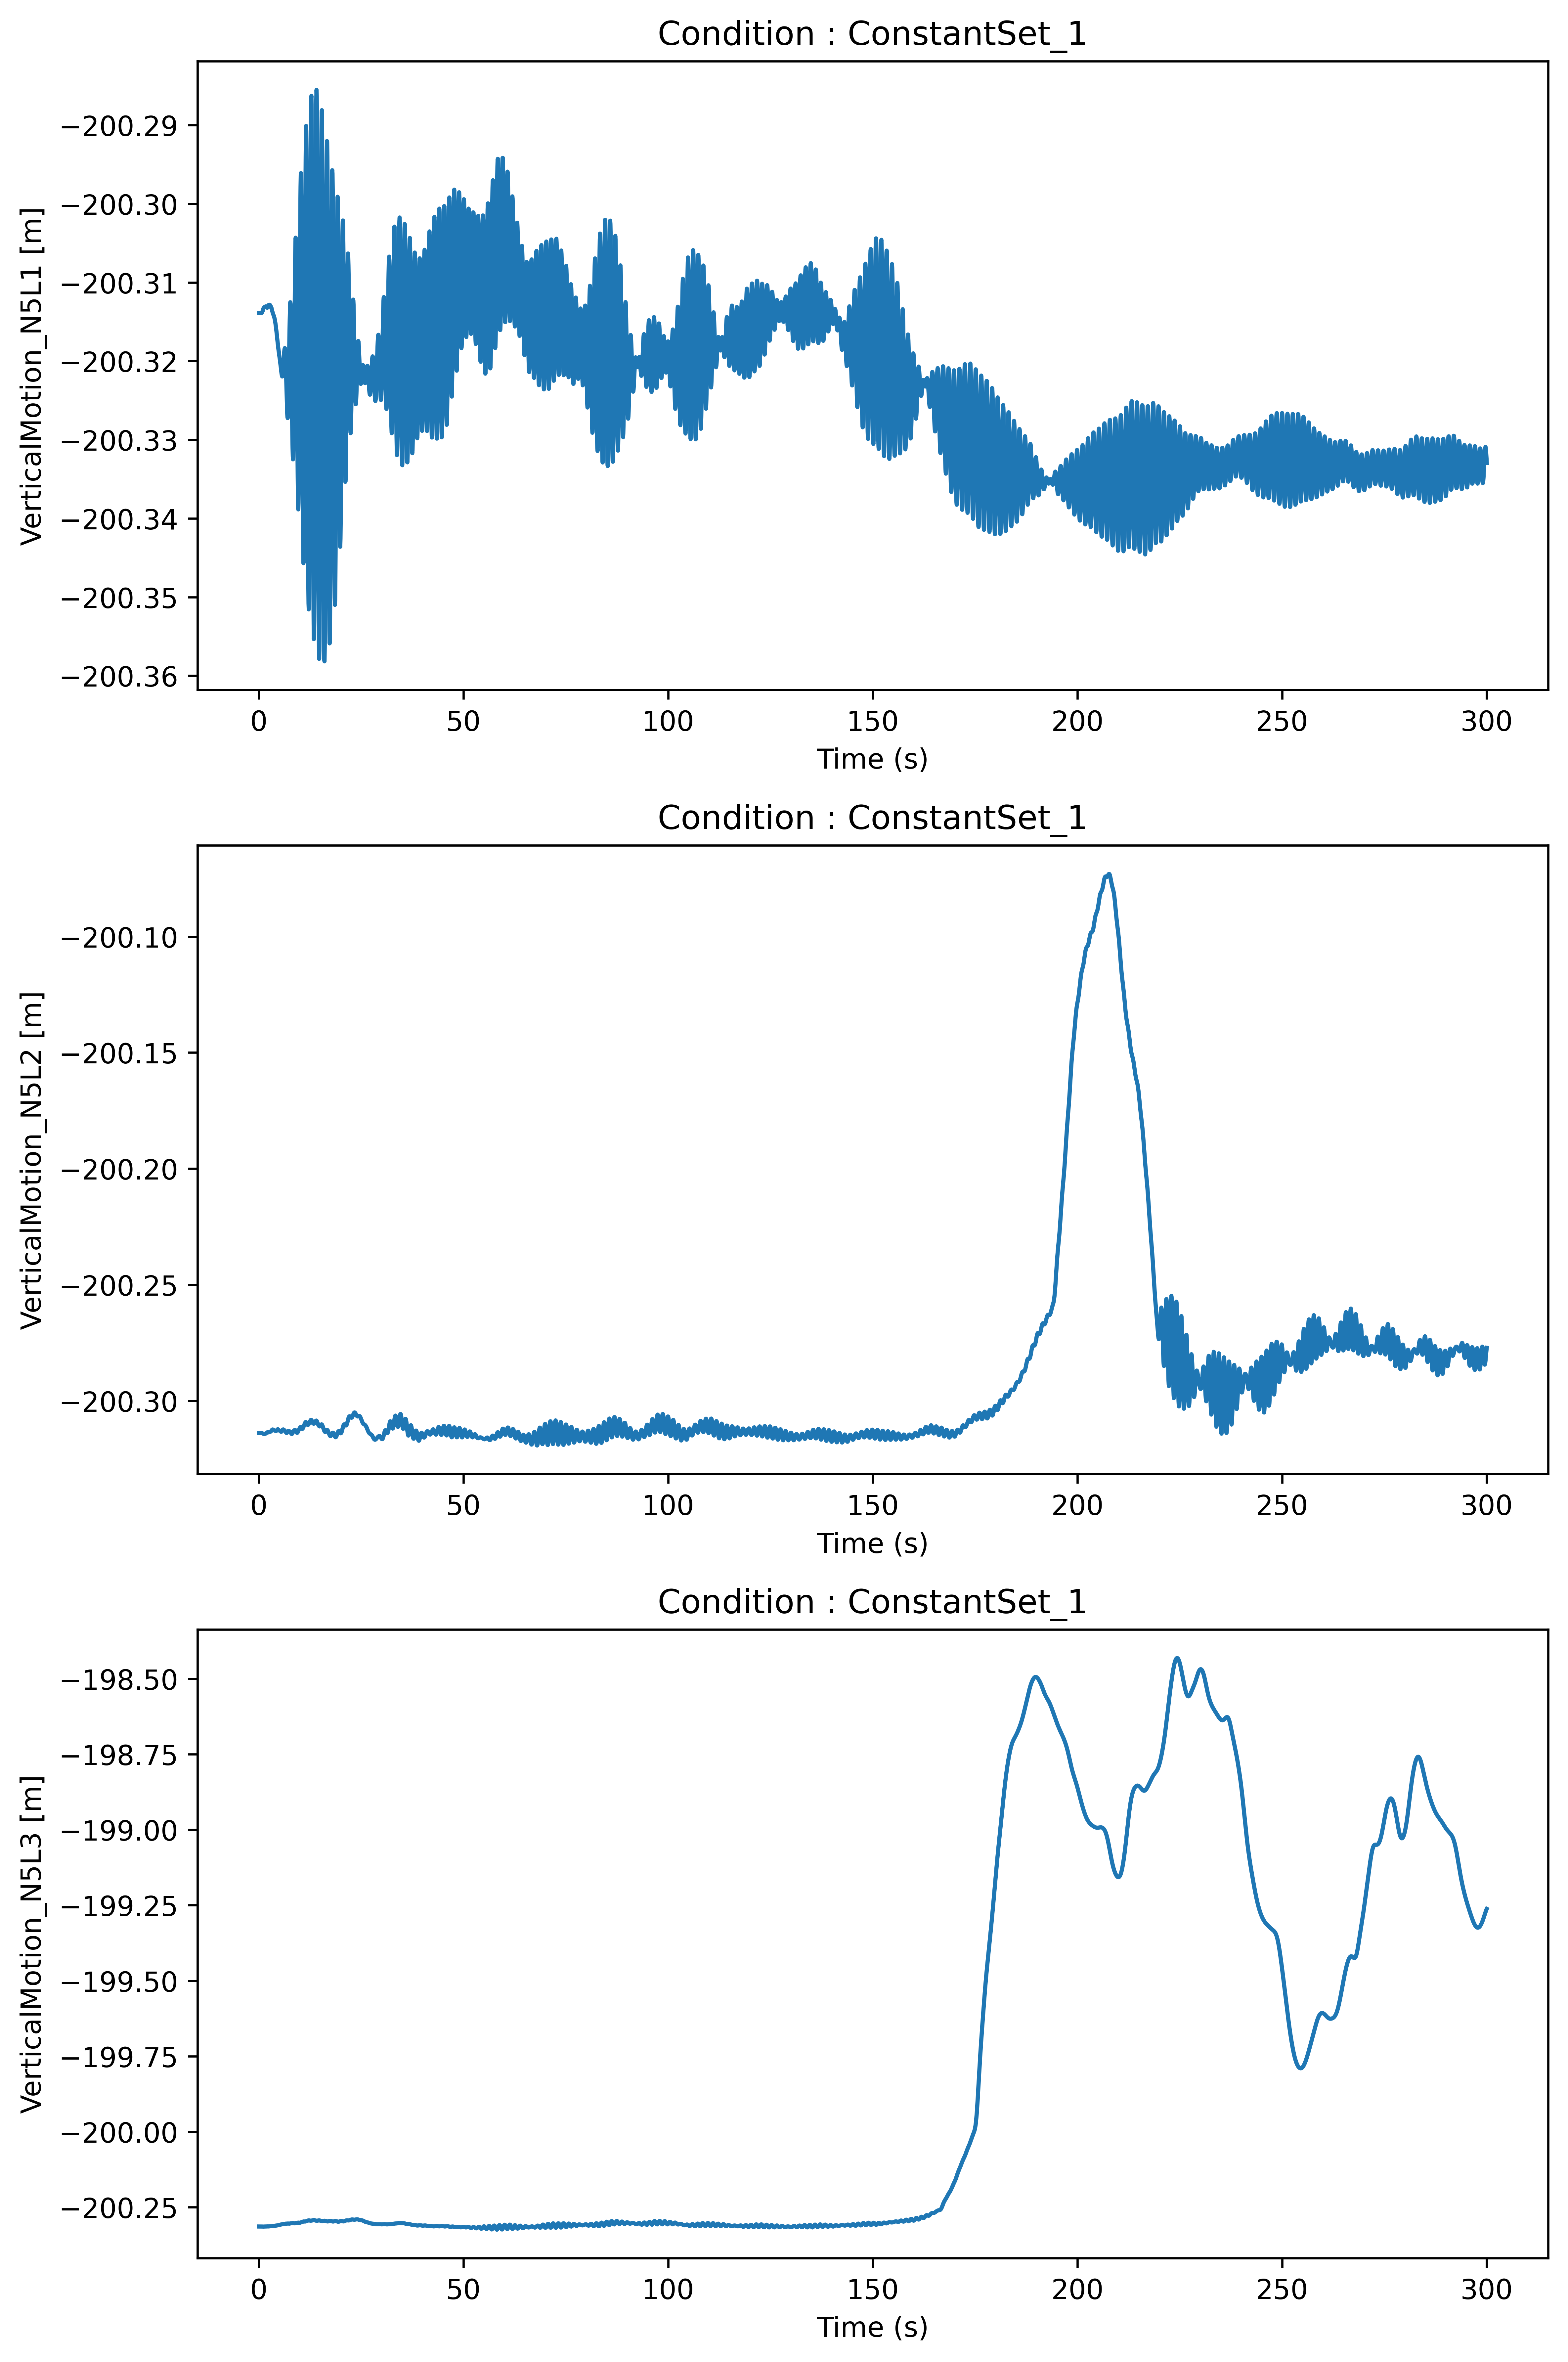

In [13]:
outputs = [
    'VerticalMotion_N5L1 [m]',
    'VerticalMotion_N5L2 [m]',
    'VerticalMotion_N5L3 [m]',
]
cond = H1_perm.df.coords['condition'].values[0]
fig,ax = plt.subplots(len(outputs),1, figsize=(8, 12), dpi=600)

for j,output in enumerate(outputs):
    time, serie = H1.timeserie({'model':'FlexibleMB_C1P5', 'condition':cond, 'analysis':'Dynamic'}, output)
    ax[j].plot(time, serie)
    ax[j].set_title('Condition : ' + cond)
    ax[j].set_xlabel('Time (s)')
    ax[j].set_ylabel(output)

fig.tight_layout()

#### Statistical analysis

In [23]:
def plot_bottomchain_stats_comparison(axs, x, res, lines_outputs, lines_colors, ls = '-'):
    lines = list(lines_outputs.keys())

    for i in range(len(lines)):
        line = lines[i]
        vals = []
        outputs = lines_outputs[line]
        for output in outputs:
            mean, std = res[output].mean() , res[output].std()
            vals.append([mean, std/mean * 100])
        vals = np.array(vals)

        diag0 = axs[0].plot(x, vals[:,0], color=lines_colors[line], ls = ls)
        diag1 = axs[1].plot(x, vals[:,1], color=lines_colors[line], ls = ls)
    
        axs[0].set_title('Mean for condition selected')
        axs[1].set_title('Normalized std for condition selected')
        axs[1].set_ylim(0,100)


----------Successfully extracted run to panda.Dataframe structure-----------

       VerticalMotion_N1L1 [m]  VerticalMotion_N2L1 [m]  \
count              6000.000000              6000.000000   
mean               -191.350862              -197.888436   
std                   1.474812                 1.530320   
min                -193.504196              -200.023575   
25%                -192.915459              -199.523094   
50%                -190.595581              -197.155960   
75%                -190.068310              -196.574112   
max                -188.958313              -195.381607   

       VerticalMotion_N3L1 [m]  VerticalMotion_N4L1 [m]  \
count              6000.000000              6000.000000   
mean               -200.091827              -200.326989   
std                   0.243918                 0.025892   
min                -200.344116              -200.357239   
25%                -200.308018              -200.348602   
50%                -200.093170     

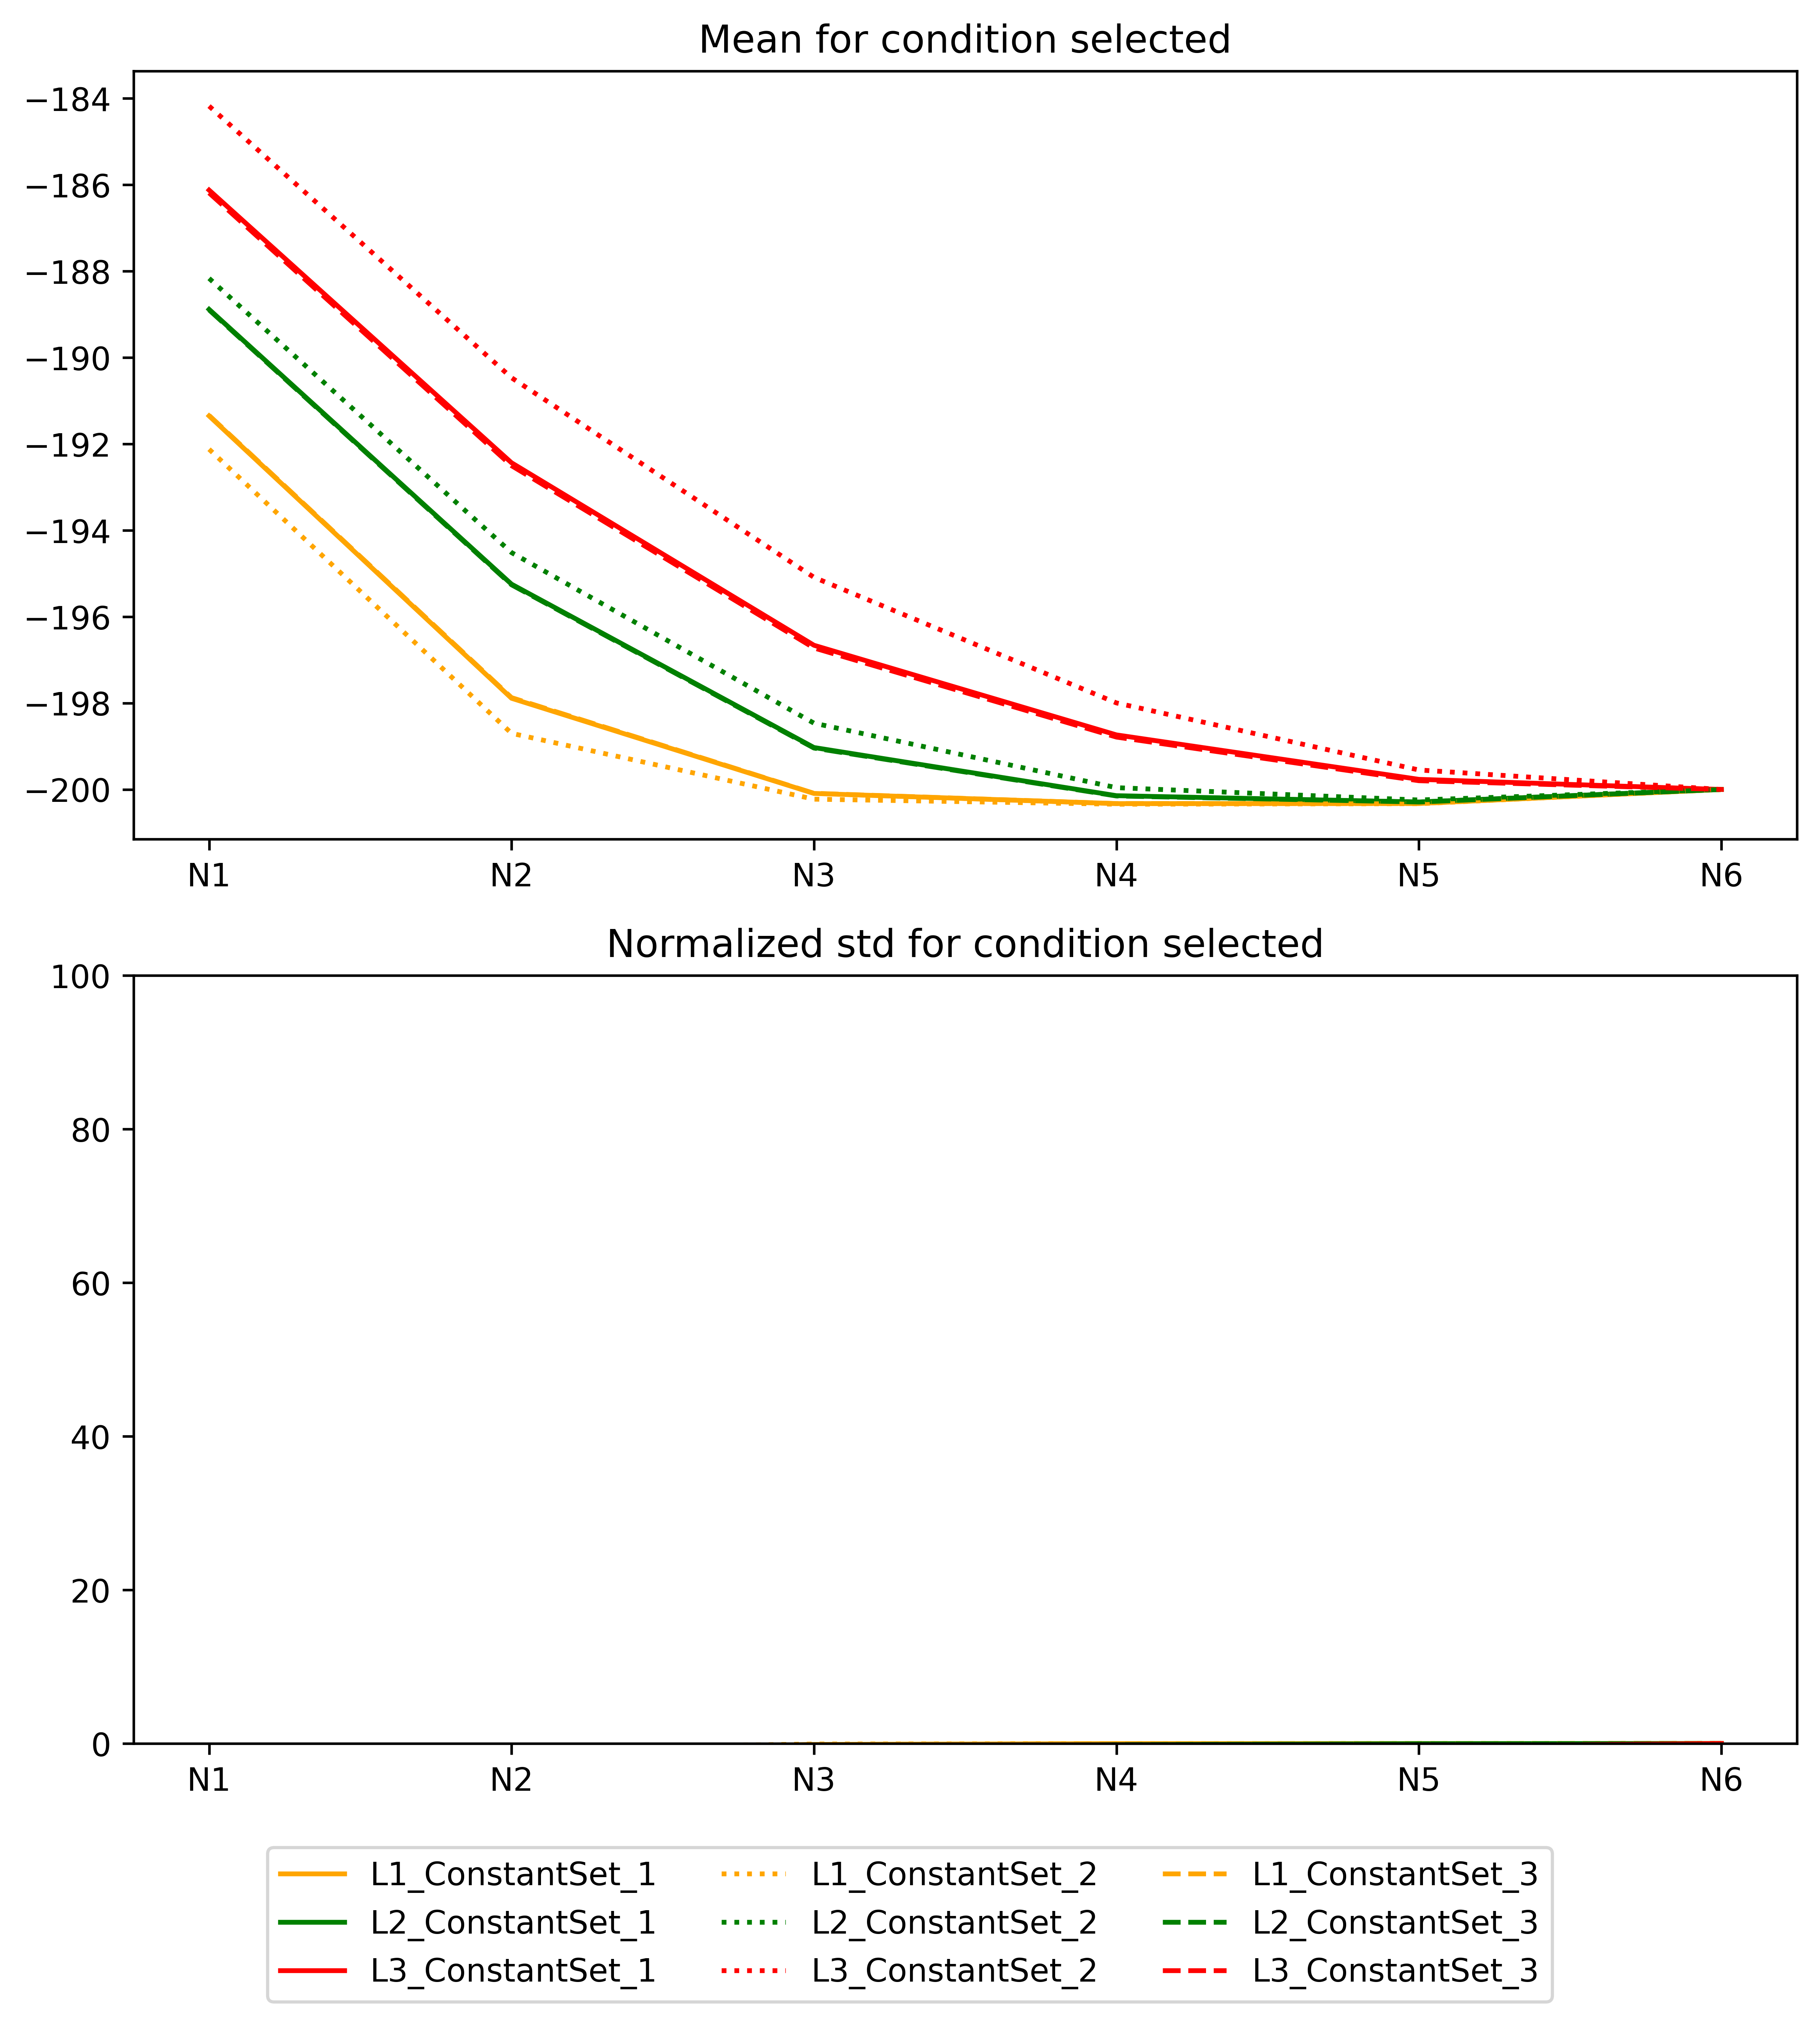

In [24]:
x = ['N'+str(i) for i in range(1,7)]
# x = ['E'+str(i) for i in range(1,8)]

# lines_outputs = {
#     'L1':[
#         'NormalBottomForceE1L1 [N]',
#         'NormalBottomForceE2L1 [N]',
#         'NormalBottomForceE3L1 [N]',
#         'NormalBottomForceE4L1 [N]',
#         'NormalBottomForceE5L1 [N]',
#         'NormalBottomForceE6L1 [N]',
#         'NormalBottomForceE7L1 [N]',
#     ],
#     'L2':[
#         'NormalBottomForceE1L2 [N]',
#         'NormalBottomForceE2L2 [N]',
#         'NormalBottomForceE3L2 [N]',
#         'NormalBottomForceE4L2 [N]',
#         'NormalBottomForceE5L2 [N]',
#         'NormalBottomForceE6L2 [N]',
#         'NormalBottomForceE7L2 [N]',
#     ],
#     'L3':[
#         'NormalBottomForceE1L3 [N]',
#         'NormalBottomForceE2L3 [N]',
#         'NormalBottomForceE3L3 [N]',
#         'NormalBottomForceE4L3 [N]',
#         'NormalBottomForceE5L3 [N]',
#         'NormalBottomForceE6L3 [N]',
#         'NormalBottomForceE7L3 [N]',
#     ]
# }

lines_outputs = {
    'L1':[
        'VerticalMotion_N1L1 [m]',
        'VerticalMotion_N2L1 [m]',
        'VerticalMotion_N3L1 [m]',
        'VerticalMotion_N4L1 [m]',
        'VerticalMotion_N5L1 [m]',
        'VerticalMotion_N6L1 [m]',
    ],
    'L2':[
        'VerticalMotion_N1L2 [m]',
        'VerticalMotion_N2L2 [m]',
        'VerticalMotion_N3L2 [m]',
        'VerticalMotion_N4L2 [m]',
        'VerticalMotion_N5L2 [m]',
        'VerticalMotion_N6L2 [m]',
    ],
    'L3':[
        'VerticalMotion_N1L3 [m]',
        'VerticalMotion_N2L3 [m]',
        'VerticalMotion_N3L3 [m]',
        'VerticalMotion_N4L3 [m]',
        'VerticalMotion_N5L3 [m]',
        'VerticalMotion_N6L3 [m]',
    ]
}

lines_colors = {
    'L1':'orange',
    'L2':'green',
    'L3':'red'
}

# conds = [H1_perm.df.coords['condition'].values[0], H1_perm.df.coords['condition'].values[1], H1_perm.df.coords['condition'].values[13]]
conds = [H1_perm.df.coords['condition'].values[0],H1_perm.df.coords['condition'].values[1],H1_perm.df.coords['condition'].values[2]]

ls_conds = {
    conds[0]:'-',
    conds[1]:':',
    conds[2]:'--',
}

fig,ax = plt.subplots(2,1, figsize=(8,8), dpi=600)

for cond in conds :
    run, var = H1.extract_run({'model':'FlexibleMB_C1P5', 'analysis':'Dynamic', 'condition':cond}, show=True)
    plot_bottomchain_stats_comparison(
        ax,
        x,
        run,
        lines_outputs,
        lines_colors,
        ls = ls_conds[cond]
    )


legend = [
    line + '_' + cond for cond in conds for line in list(lines_outputs.keys())
]
print(legend)
fig.legend(legend, ncol = 3, loc='upper center', bbox_to_anchor = (0.5,0))
fig.tight_layout()

#### Spectral analysis

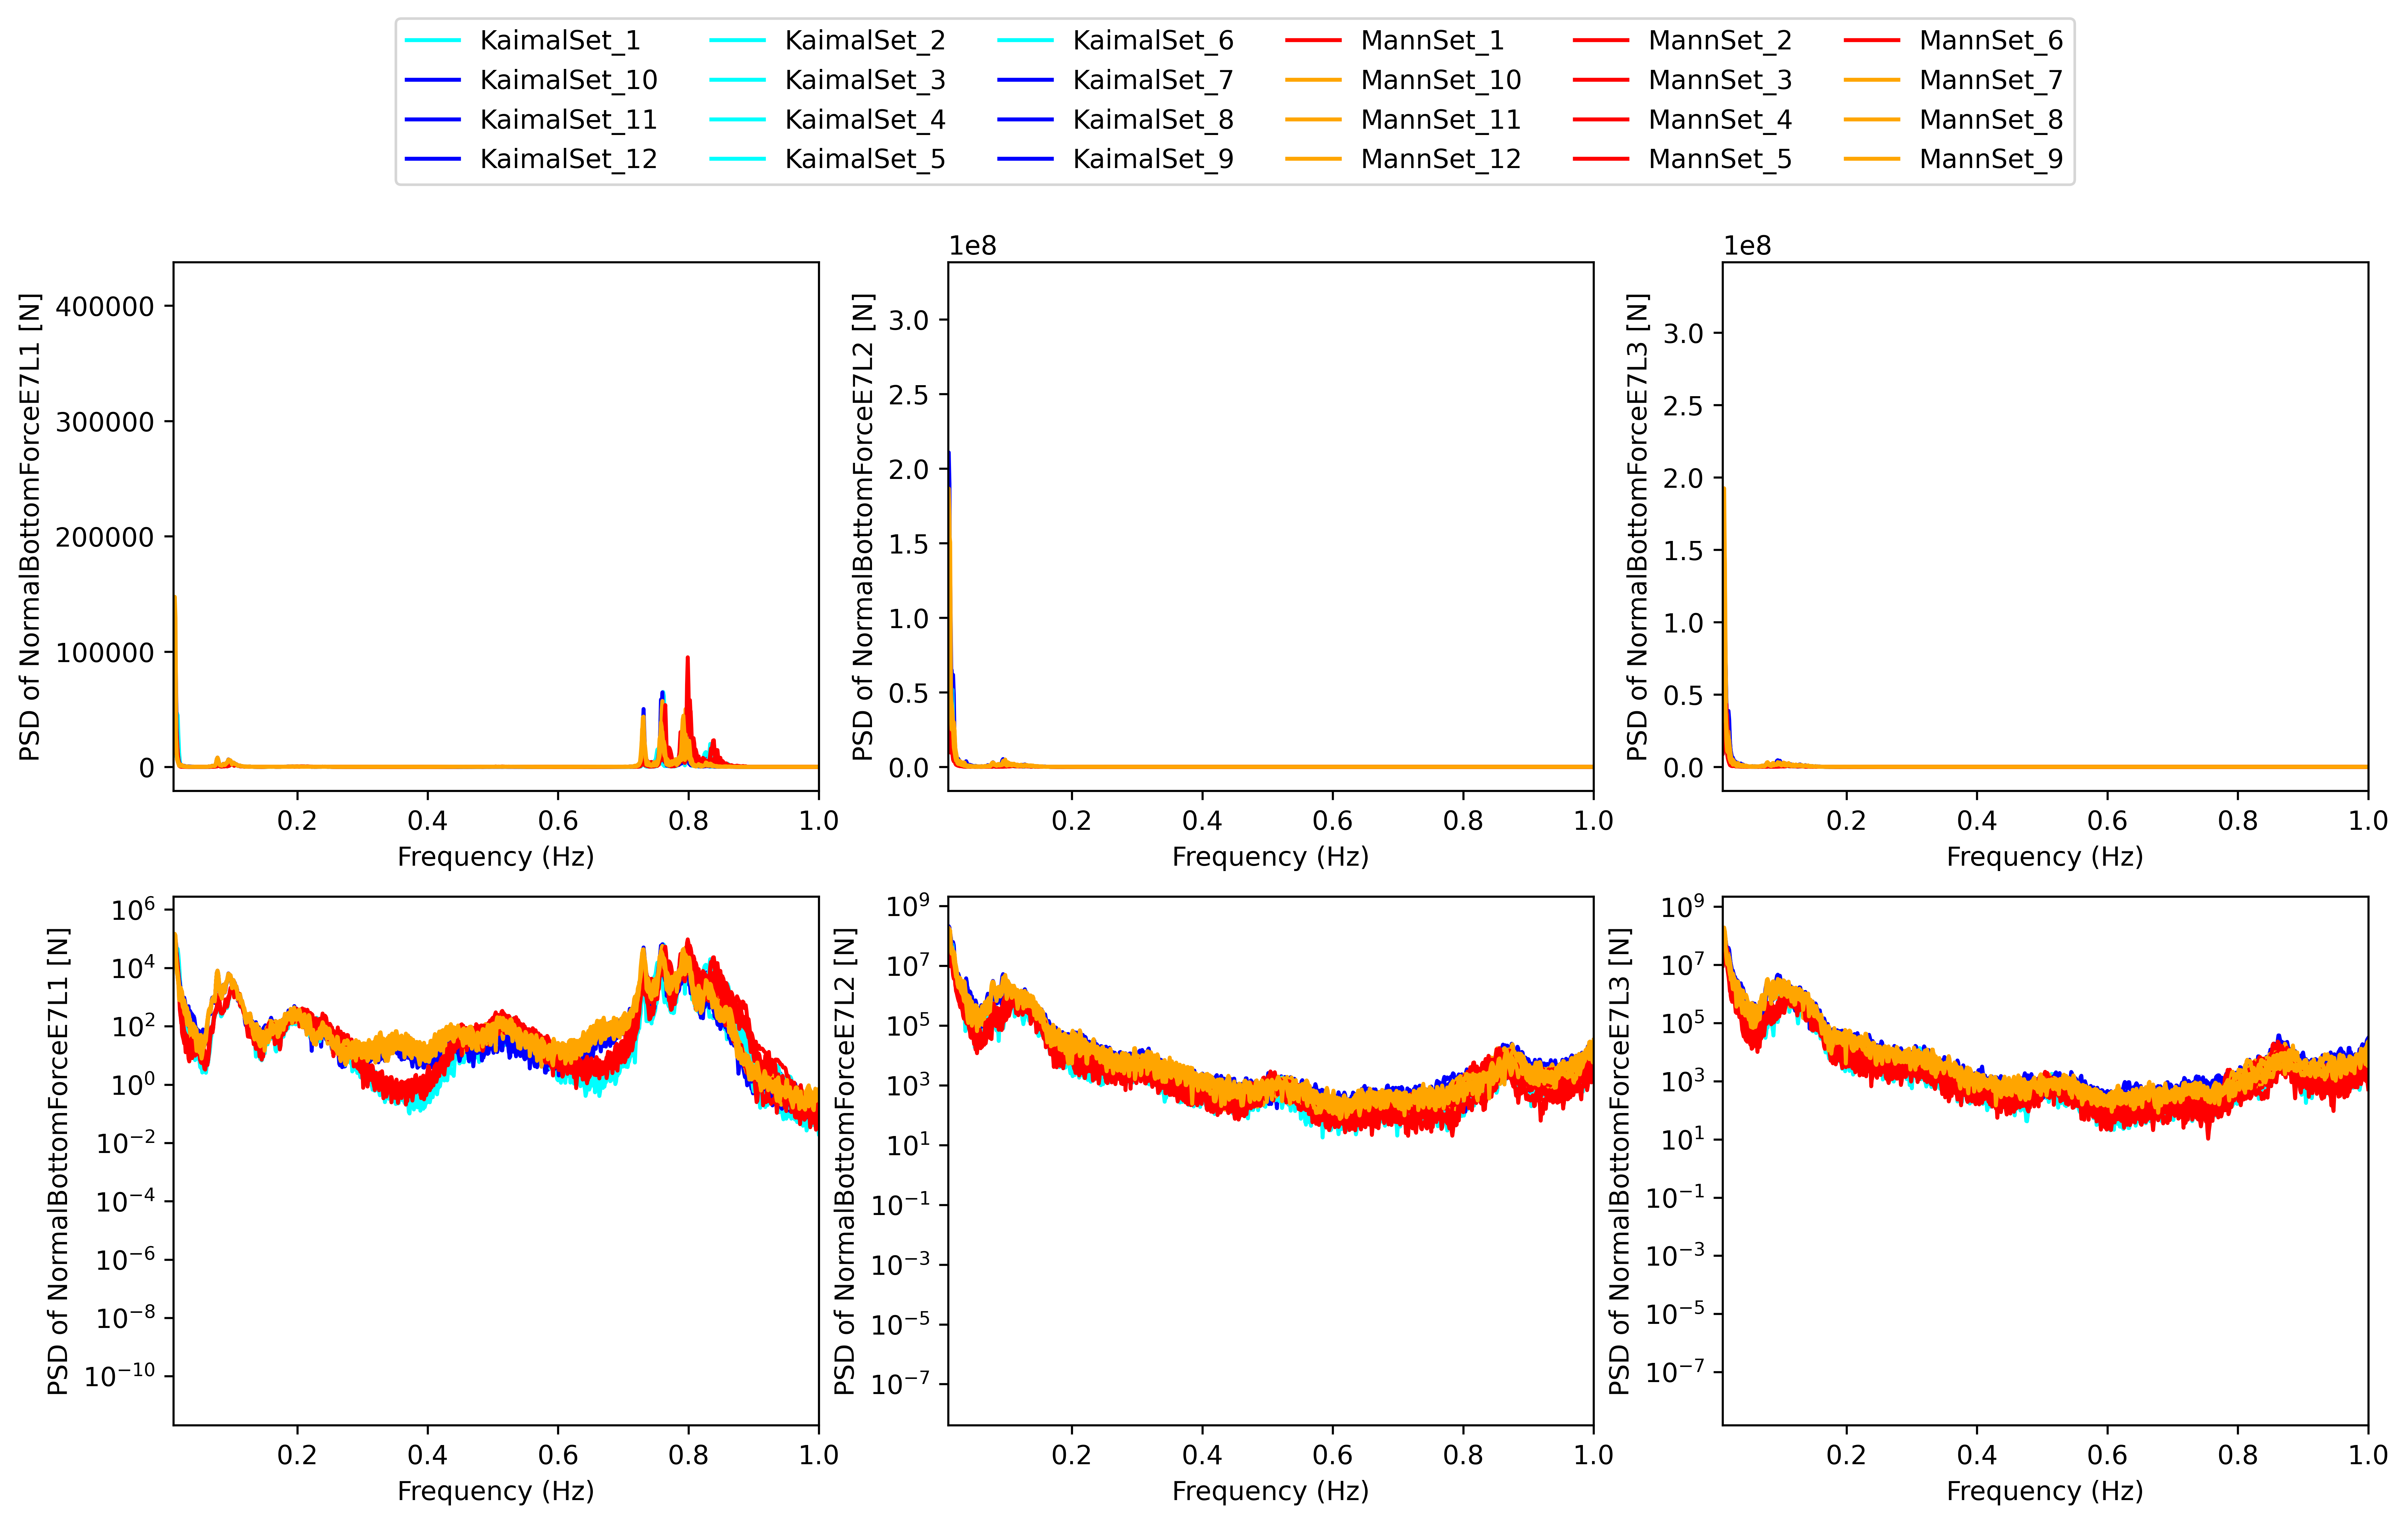

In [12]:
outputs = [
    'NormalBottomForceE7L1 [N]',
    'NormalBottomForceE7L2 [N]',
    'NormalBottomForceE7L3 [N]',
]
conds = H1_perm.df.coords['condition'].values#[:2]

dict_cond_colors = {'KaimalSet_1':'cyan', 'KaimalSet_10':'blue', 'KaimalSet_11':'blue', 'KaimalSet_12':'blue', 'KaimalSet_2':'cyan',
 'KaimalSet_3':'cyan', 'KaimalSet_4':'cyan', 'KaimalSet_5':'cyan', 'KaimalSet_6':'cyan', 'KaimalSet_7':'blue',
 'KaimalSet_8':'blue', 'KaimalSet_9':'blue', 'MannSet_1':'red', 'MannSet_10':'orange', 'MannSet_11':'orange',
 'MannSet_12':'orange', 'MannSet_2':'red', 'MannSet_3':'red', 'MannSet_4':'red', 'MannSet_5':'red', 'MannSet_6':'red',
 'MannSet_7':'orange', 'MannSet_8':'orange', 'MannSet_9':'orange'}

fig,ax = plt.subplots(2,len(outputs), figsize=(15, 8), dpi=600)

leg = []
for i, cond in enumerate(conds):
    run, var = H1_perm.extract_run({'model':'Baseline', 'analysis':'Dynamic', 'condition':cond}, show = False)
    leg.append(cond)
    for j, output in enumerate(outputs):
        t, serie = run[output].index, np.array(run[output])
        dt = t[1]-t[0]
        f,Sp = PSD_wave4(serie, dt)

        ax[0,j].plot(f, Sp, color = dict_cond_colors[cond])
        ax[0,j].set_xlabel('Frequency (Hz)')
        ax[0,j].set_ylabel('PSD of ' + output)
        ax[0,j].set_xlim(0.01,1)

        ax[1,j].semilogy(f, Sp, color = dict_cond_colors[cond])
        ax[1,j].set_xlabel('Frequency (Hz)')
        ax[1,j].set_ylabel('PSD of ' + output)
        ax[1,j].set_xlim(0.01,1)
fig.legend(conds, ncol = 6, loc = 'upper center', bbox_to_anchor = (0.5, 1.05 ))